In [1]:
# Install missing packages if needed
!pip install pandas numpy scikit-learn matplotlib seaborn


# Step 1: Set Up and Load Data

In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load the Titanic dataset (Ensure you have uploaded it)
file_path = '/content/titanic_dataset.csv'
df = pd.read_csv(file_path)

In [4]:
# Display the first 5 rows to understand the structure of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2: Explore the Dataset

In [5]:
# Check the dataset information (data types, non-null values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for missing values in each column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Gender,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# View basic statistics of numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 3: Visualize the Dataset

In [8]:
# Set seaborn style for better-looking plots
sns.set_style("whitegrid")

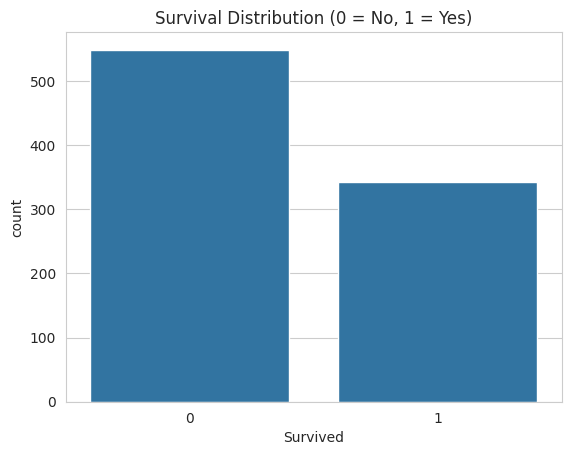

In [9]:
# Survival Distribution
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.show()

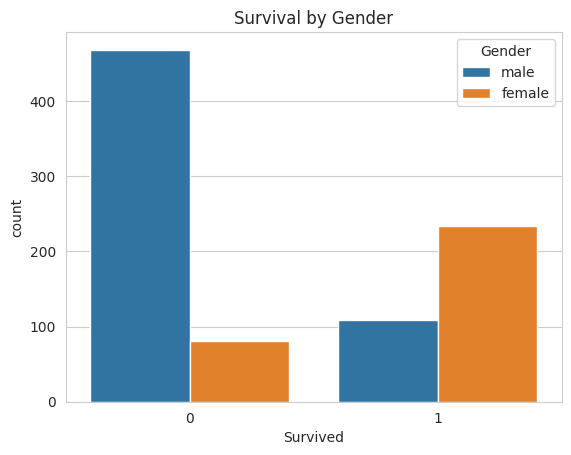

In [10]:
# Survival by Gender
sns.countplot(x='Survived', hue='Gender', data=df)
plt.title('Survival by Gender')
plt.show()

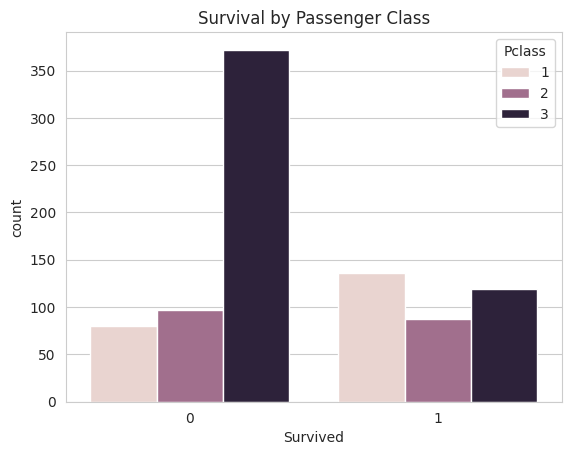

In [11]:
# Survival by Class (Pclass)
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Step 4: Data Cleaning

In [12]:
# Fill missing 'Age' with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-12-1e4f262b29a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [13]:
# Fill missing 'Embarked' with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-13-a58dc0f63d4d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [14]:
# Drop unnecessary columns (PassengerId, Name, Ticket, Cabin)
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
# Confirm no missing values remain
df.isnull().sum()

,0
Survived,0
Pclass,0
Gender,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# Step 5: Encode Categorical Variables

In [16]:
# Convert 'Gender' column to numeric (male: 0, female: 1)
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

In [17]:
# One-hot encode 'Embarked' column (drop_first=True avoids redundancy)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [18]:
# Verify the dataset after encoding
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


# Step 6: Split Data for Training and Testing

In [19]:
# Define features (X) and target (y)
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']               # Target (what we are predicting)

In [20]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Confirm shape of train and test data
X_train.shape, X_test.shape

((712, 8), (179, 8))

# Step 7: Train a Logistic Regression Model

In [22]:
# Create the model instance
model = LogisticRegression()

In [23]:
# Train (fit) the model on training data
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Step 8: Make Predictions

In [24]:
y_pred = model.predict(X_test)

# Step 9: Evaluate Model Performance

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8100558659217877


In [26]:
# Display a detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Step 10: Compare Actual vs Predicted

In [27]:
# Create a DataFrame to see actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))

     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          1
290       1          1
300       1          1
333       0          0
208       1          1
136       1          1
